<a href="https://colab.research.google.com/github/xFlodz/computer_math/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B8%20%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №10. Визуализация, анализ и прогнозирование временных рядов

# Блок №1. Теория

## 1. Регистрация и получение API ключа


Перед началом работы с API OpenWeatherMap, вам необходимо зарегистрироваться на сайте OpenWeatherMap и получить API ключ. Этот ключ будет использоваться для аутентификации ваших запросов к API.

In [2]:
API_KEY = "45c86faba28a47ef069c40fdea8bd225"

## 2. Установка необходимых библиотек


Убедитесь, что у вас установлены следующие библиотеки:
```python
pip install requests pandas plotly scikit-learn
```

*(установлены по умолчанию в colab)*

## 3. Получение и обработка данных о погоде
Следующий код демонстрирует, как получить данные о погоде для списка городов и стран:



In [3]:
import requests  # Импорт библиотеки requests для отправки HTTP-запросов
import pandas as pd  # Импорт библиотеки pandas для обработки и анализа данных

API_KEY = "45c86faba28a47ef069c40fdea8bd225"  # Ключ API для доступа к данным OpenWeatherMap
locations = ["Paris,FR", "Berlin,DE", "Moscow,RU"]  # Список мест, для которых вы хотите получить данные о погоде

weather_data_list = []  # Пустой список для хранения данных о погоде

# Цикл по всем местам в списке locations
for location in locations:
    city, country = location.split(',')  # Разделение строки на город и страну
    # Формирование URL для запроса геокодирования
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()  # Отправка запроса и получение ответа в формате JSON
    # Если ответ не пустой
    if geocode_response:
        latitude = geocode_response[0]['lat']  # Получение широты из ответа
        longitude = geocode_response[0]['lon']  # Получение долготы из ответа
        # Формирование URL для запроса прогноза погоды
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза
        # Цикл по всем записям в данных прогноза
        for entry in forecast_data:
            # Добавление данных о погоде в список
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                "humidity": entry["main"]["humidity"],  # Влажность
                "description": entry["weather"][0]["description"]  # Описание погоды
            })

# Преобразование списка в DataFrame
weather_data = pd.DataFrame(weather_data_list)
# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])


In [4]:
weather_data

,city,country,latitude,longitude,datetime,temperature,humidity,description
0,Paris,FR,48.858890,2.320041,2024-05-22 21:00:00,16.22,76,light rain
1,Paris,FR,48.858890,2.320041,2024-05-23 00:00:00,15.17,81,scattered clouds
2,Paris,FR,48.858890,2.320041,2024-05-23 03:00:00,13.30,88,light rain
3,Paris,FR,48.858890,2.320041,2024-05-23 06:00:00,12.66,81,overcast clouds
4,Paris,FR,48.858890,2.320041,2024-05-23 09:00:00,16.31,59,overcast clouds
...,...,...,...,...,...,...,...,...
115,Moscow,RU,55.750446,37.617494,2024-05-27 06:00:00,17.01,69,broken clouds
116,Moscow,RU,55.750446,37.617494,2024-05-27 09:00:00,20.27,56,overcast clouds
117,Moscow,RU,55.750446,37.617494,2024-05-27 12:00:00,21.43,51,overcast clouds
118,Moscow,RU,55.750446,37.617494,2024-05-27 15:00:00,21.42,50,overcast clouds


## 4. Визуализация данных
Для визуализации данных о погоде на карте мы можем использовать библиотеку Plotly:


In [5]:
import plotly.express as px  # Импорт модуля plotly.express для создания интерактивных графиков

# Создание диаграммы рассеяния на карте с использованием данных о погоде
fig = px.scatter_mapbox(weather_data,  # Данные для графика
                        lat="latitude",  # Колонка в данных, которая будет использоваться для широты точек на карте
                        lon="longitude",  # Колонка в данных, которая будет использоваться для долготы точек на карте
                        color="temperature",  # Колонка в данных, которая будет использоваться для цвета точек
                        size="humidity",  # Колонка в данных, которая будет использоваться для размера точек
                        hover_name="city",  # Колонка в данных, которая будет отображаться при наведении на точку
                        hover_data=["description"],  # Дополнительные данные, которые будут отображаться при наведении на точку
                        # Создание анимации по времени. Время преобразуется в строку для корректного отображения
                        animation_frame=weather_data['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},  # Центр карты при открытии
                        zoom=3,  # Уровень приближения карты при открытии
                        mapbox_style="carto-positron",  # Стиль карты
                        title="Weather Forecast")  # Заголовок графика

fig.show()  # Отображение графика


In [6]:
import requests
import pandas as pd
import plotly.express as px

# Замените на свой API ключ OpenWeatherMap
API_KEY = "45c86faba28a47ef069c40fdea8bd225"

# Список городов и стран для запроса
locations = [
    {"city": "New York", "country": "US"},
    {"city": "Moscow", "country": "RU"},
    {"city": "London", "country": "GB"},
    {"city": "Cape town", "country": "ZA"},
    {"city": "Davao", "country": "PH"},
    {"city": "Tokyo", "country": "JP"},
    {"city": "Manila", "country": "PH"},
    {"city": "Lagos", "country": "NG"},
    {"city": "Montevideo", "country": "UY"},
    # Добавьте другие города и страны по вашему выбору
]

# Запрос данных о погоде
weather_data = []
for loc in locations:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={loc['city']},{loc['country']}&appid={API_KEY}"
    response = requests.get(url)
    data = response.json()
    weather_data.append({
        "city": loc["city"],
        "country": loc["country"],
        "temperature": data["main"]["temp"] - 273.15,  # Кельвины в Цельсии
        "lon": data["coord"]["lon"],  # Долгота для Scatter plot
        "lat": data["coord"]["lat"],  # Широта для Scatter plot
    })

# Создание DataFrame
df = pd.DataFrame(weather_data)

# Визуализация на тематической карте
fig = px.scatter_geo(
    df,
    lat="lat",
    lon="lon",
    color="temperature",
    hover_name="city",
    title="Температура в разных городах",
    color_continuous_scale="Viridis",
    projection="natural earth"
)

fig.show()


# Блок 2. Анализ данных

### Задание №1. Получите прогноз погоды на 5 дней по любым 4 городам

In [7]:
import requests  # Импорт библиотеки requests для отправки HTTP-запросов
import pandas as pd  # Импорт библиотеки pandas для обработки и анализа данных

API_KEY = "45c86faba28a47ef069c40fdea8bd225"  # Ключ API для доступа к данным OpenWeatherMap
locations = ["Davao,PH", "Montevideo,PH", "Moscow,RU", "London,GB"]  # Список мест, для которых вы хотите получить данные о погоде

weather_data_list = []  # Пустой список для хранения данных о погоде

# Цикл по всем местам в списке locations
for location in locations:
    city, country = location.split(',')  # Разделение строки на город и страну
    # Формирование URL для запроса геокодирования
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()  # Отправка запроса и получение ответа в формате JSON
    # Если ответ не пустой
    if geocode_response:
        latitude = geocode_response[0]['lat']  # Получение широты из ответа
        longitude = geocode_response[0]['lon']  # Получение долготы из ответа
        # Формирование URL для запроса прогноза погоды
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза
        # Цикл по всем записям в данных прогноза
        for entry in forecast_data:
            # Добавление данных о погоде в список
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                "feels_like": entry["main"]["feels_like"] - 273.15, # Температура по ощущению (с преобразованием)
                "temp_min": entry["main"]["temp_min"] - 273.15, # Минимальная температура (с преобразованием)
                "temp_max": entry["main"]["temp_max"] - 273.15, # Максимальная температура (с преобразованием)
                "pressure": entry["main"]["pressure"],  # Давление
                "humidity": entry["main"]["humidity"],  # Влажность
                "description": entry["weather"][0]["description"]  # Описание погоды
            })

# Преобразование списка в DataFrame
weather_data = pd.DataFrame(weather_data_list)
# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

weather_data

,city,country,latitude,longitude,datetime,temperature,feels_like,temp_min,temp_max,pressure,humidity,description
0,Davao,PH,7.064831,125.608062,2024-05-22 21:00:00,25.62,26.48,25.62,25.62,1008,86,broken clouds
1,Davao,PH,7.064831,125.608062,2024-05-23 00:00:00,26.28,26.28,26.28,27.61,1008,82,broken clouds
2,Davao,PH,7.064831,125.608062,2024-05-23 03:00:00,28.37,31.71,28.37,29.75,1008,72,overcast clouds
3,Davao,PH,7.064831,125.608062,2024-05-23 06:00:00,30.37,34.70,30.37,30.37,1006,65,overcast clouds
4,Davao,PH,7.064831,125.608062,2024-05-23 09:00:00,29.22,34.03,29.22,29.22,1006,74,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...
155,London,GB,51.507322,-0.127647,2024-05-27 06:00:00,10.77,10.02,10.77,10.77,1017,81,scattered clouds
156,London,GB,51.507322,-0.127647,2024-05-27 09:00:00,15.71,14.82,15.71,15.71,1017,57,clear sky
157,London,GB,51.507322,-0.127647,2024-05-27 12:00:00,17.76,16.79,17.76,17.76,1017,46,few clouds
158,London,GB,51.507322,-0.127647,2024-05-27 15:00:00,17.83,16.90,17.83,17.83,1016,47,broken clouds


### Задание №2. Вычислите общее среднее значение и стандартное отклонение температуры по всем городам

In [8]:
average_temp = weather_data['temperature'].mean()
std_temp = weather_data['temperature'].std()

print('Средняя температура по всем городам:', average_temp)
print('Стандартное отклонение температуры по всем городам:', std_temp)

Средняя температура по всем городам: 21.616000000000025
Стандартное отклонение температуры по всем городам: 7.210034429736615


### Задание №3. Визуализируйте распределения температуры по дням. Отдельно по каждому городу (На одной плоскости должно быть четыре графика)


##### Пример визуализации по одному городу:

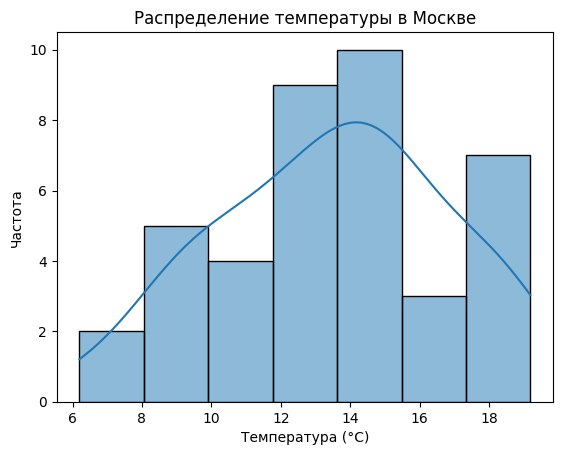

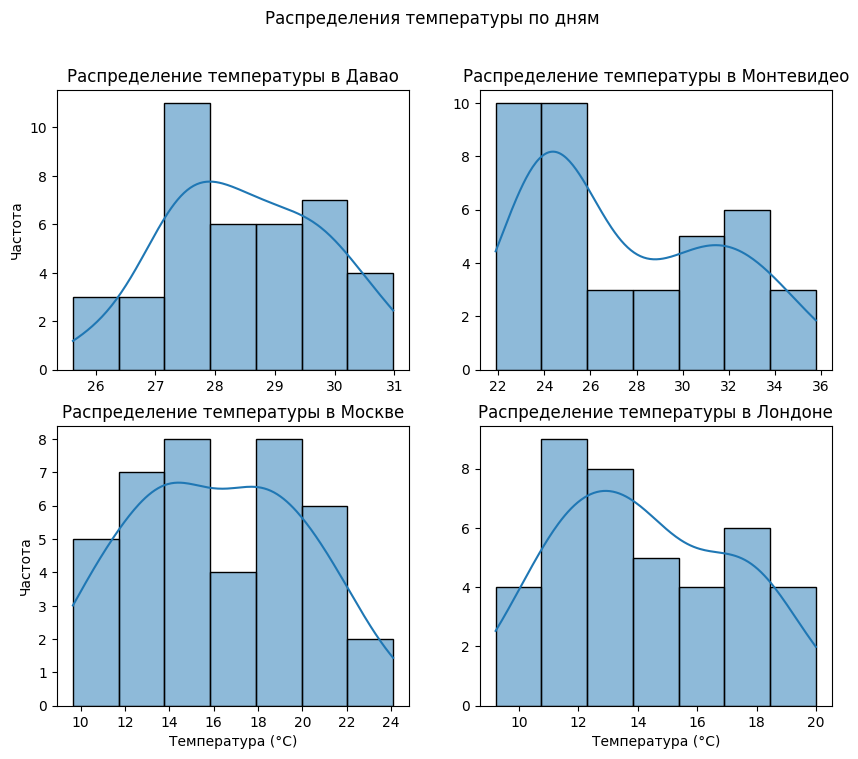

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Распределения температуры по дням')

sns.histplot(ax=axes[0, 0], kde=True, x=weather_data[weather_data['city'] == 'Davao']['temperature'])
axes[0, 0].set_title('Распределение температуры в Давао')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Частота')

sns.histplot(ax=axes[0, 1], kde=True, x=weather_data[weather_data['city'] == 'Montevideo']['temperature'])
axes[0, 1].set_title('Распределение температуры в Монтевидео')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

sns.histplot(ax=axes[1, 0], kde=True, x=weather_data[weather_data['city'] == 'Moscow']['temperature'])
axes[1, 0].set_title('Распределение температуры в Москве')
axes[1, 0].set_xlabel('Температура (°C)')
axes[1, 0].set_ylabel('Частота')

sns.histplot(ax=axes[1, 1], kde=True, x=weather_data[weather_data['city'] == 'London']['temperature'])
axes[1, 1].set_title('Распределение температуры в Лондоне')
axes[1, 1].set_xlabel('Температура (°C)')
axes[1, 1].set_ylabel('')

plt.show()

### Задание №4. Визуализируйте Корреляционну матрицу. Отдельно по каждому городу (На одной плоскости должно быть четыре графика). Затем общую корреляционную матрицу по всем данным из набора.


##### Пример визуализации по одному городу:

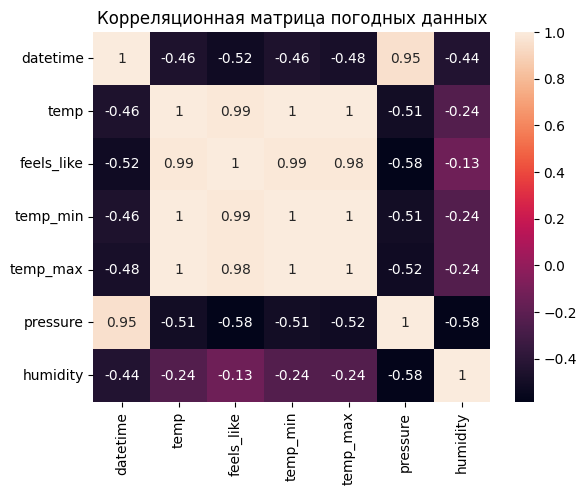

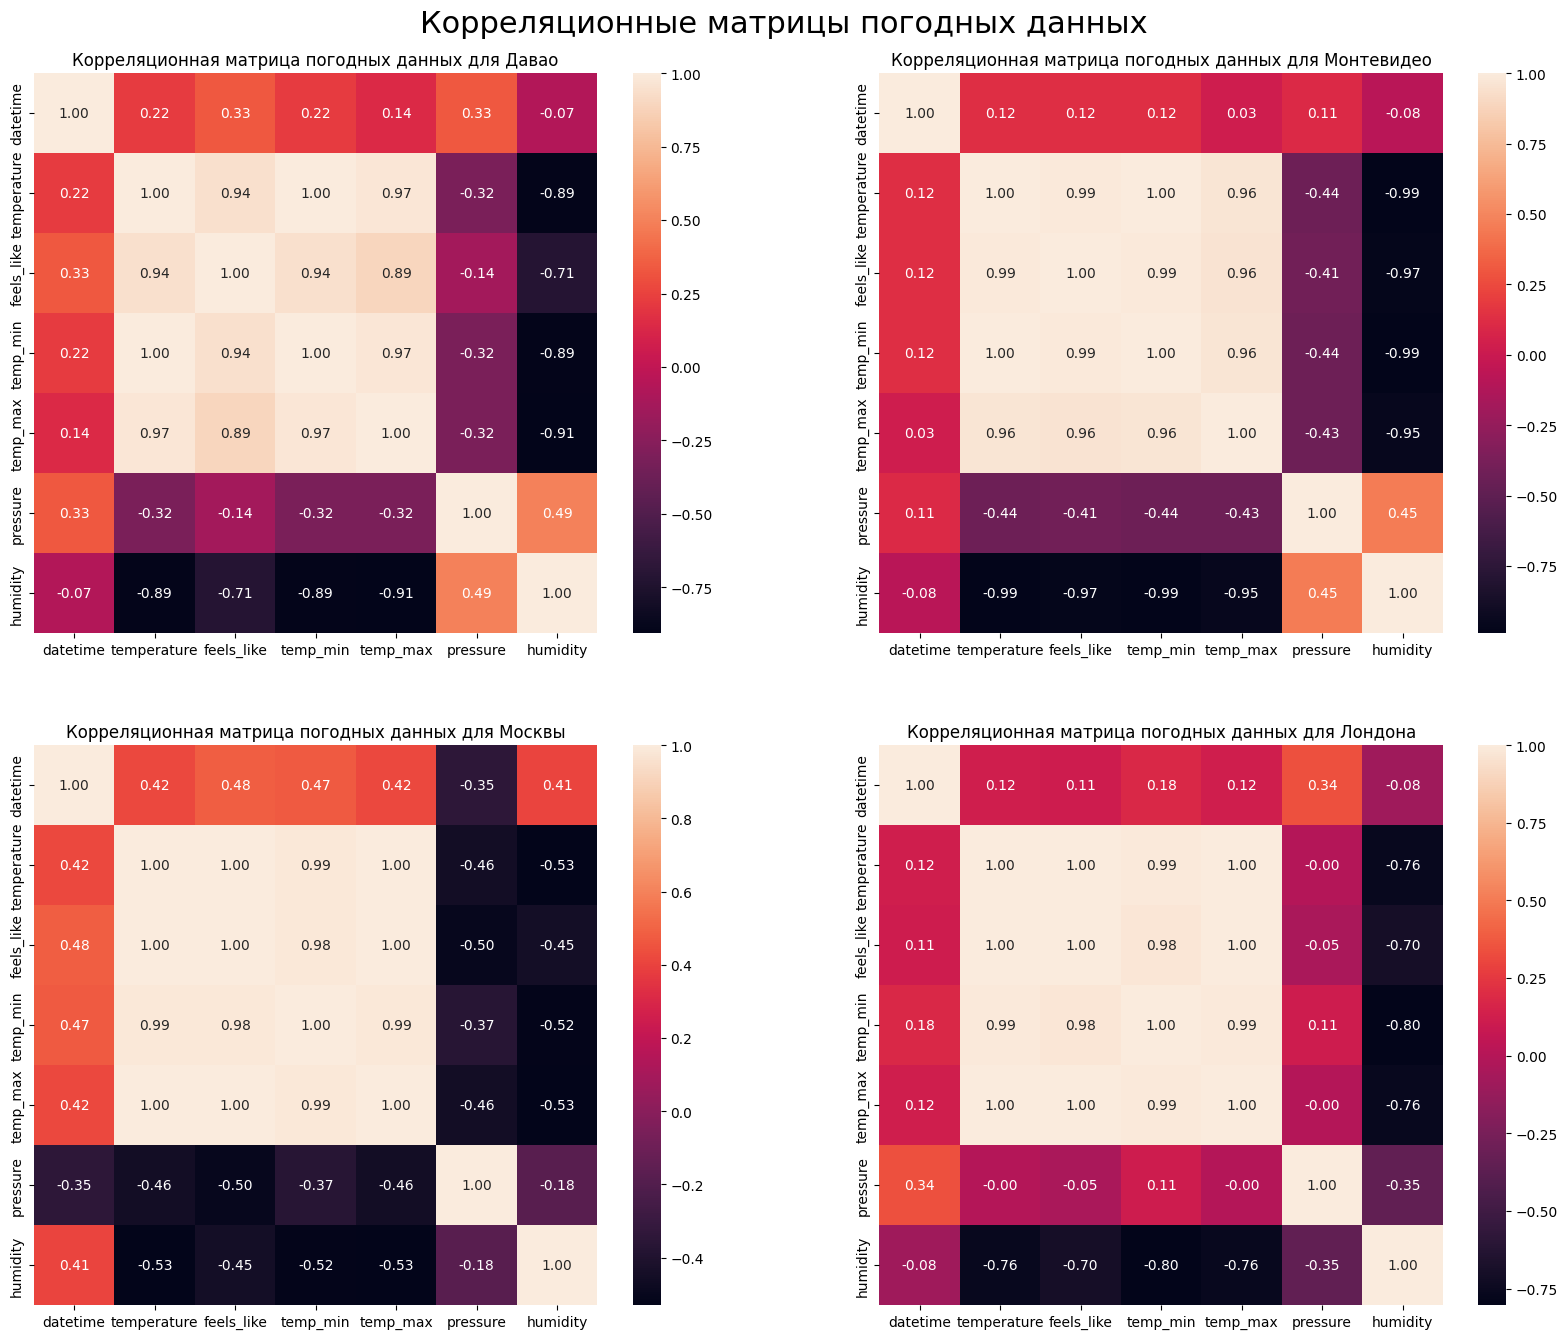

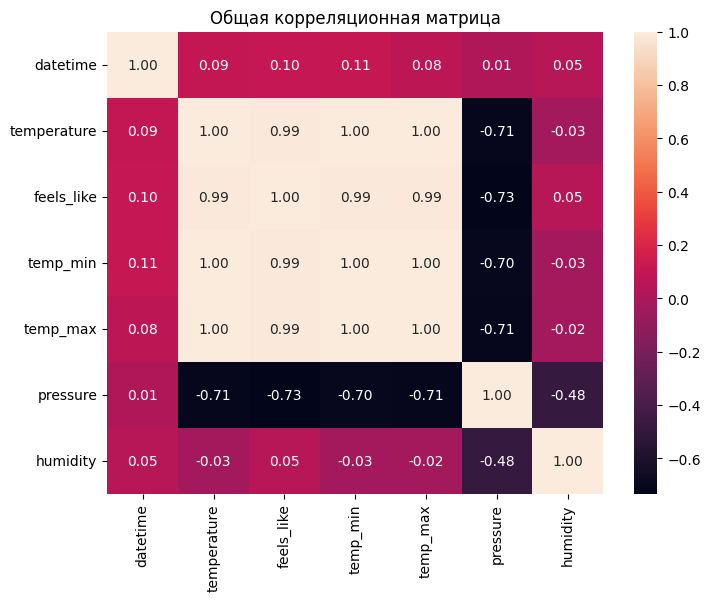

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Корреляционные матрицы погодных данных', y=0.92, fontsize=22)

sns.heatmap(ax=axes[0, 0], data=weather_data[weather_data['city'] == 'Davao'][['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[0, 0].set_title('Корреляционная матрица погодных данных для Давао')

sns.heatmap(ax=axes[0, 1], data=weather_data[weather_data['city'] == 'Montevideo'][['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[0, 1].set_title('Корреляционная матрица погодных данных для Монтевидео')

sns.heatmap(ax=axes[1, 0], data=weather_data[weather_data['city'] == 'Moscow'][['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[1, 0].set_title('Корреляционная матрица погодных данных для Москвы')

sns.heatmap(ax=axes[1, 1], data=weather_data[weather_data['city'] == 'London'][['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[1, 1].set_title('Корреляционная матрица погодных данных для Лондона')

plt.show()
print('\n')

plt.figure(figsize=(8, 6))
sns.heatmap(data=weather_data[['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
plt.title('Общая корреляционная матрица')

plt.show()

### Задание №5. Визуализируйте тренд изменения температуры со временем. Отдельно по каждому городу (На одной плоскости должно быть четыре графика).

##### Пример визуализации по одному городу:

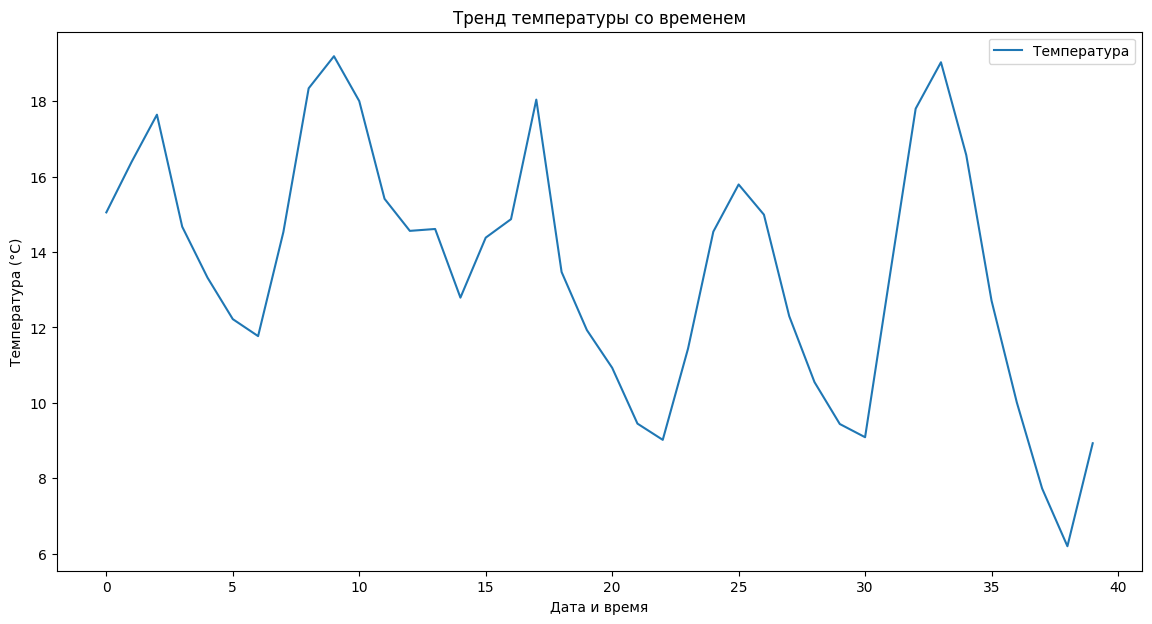

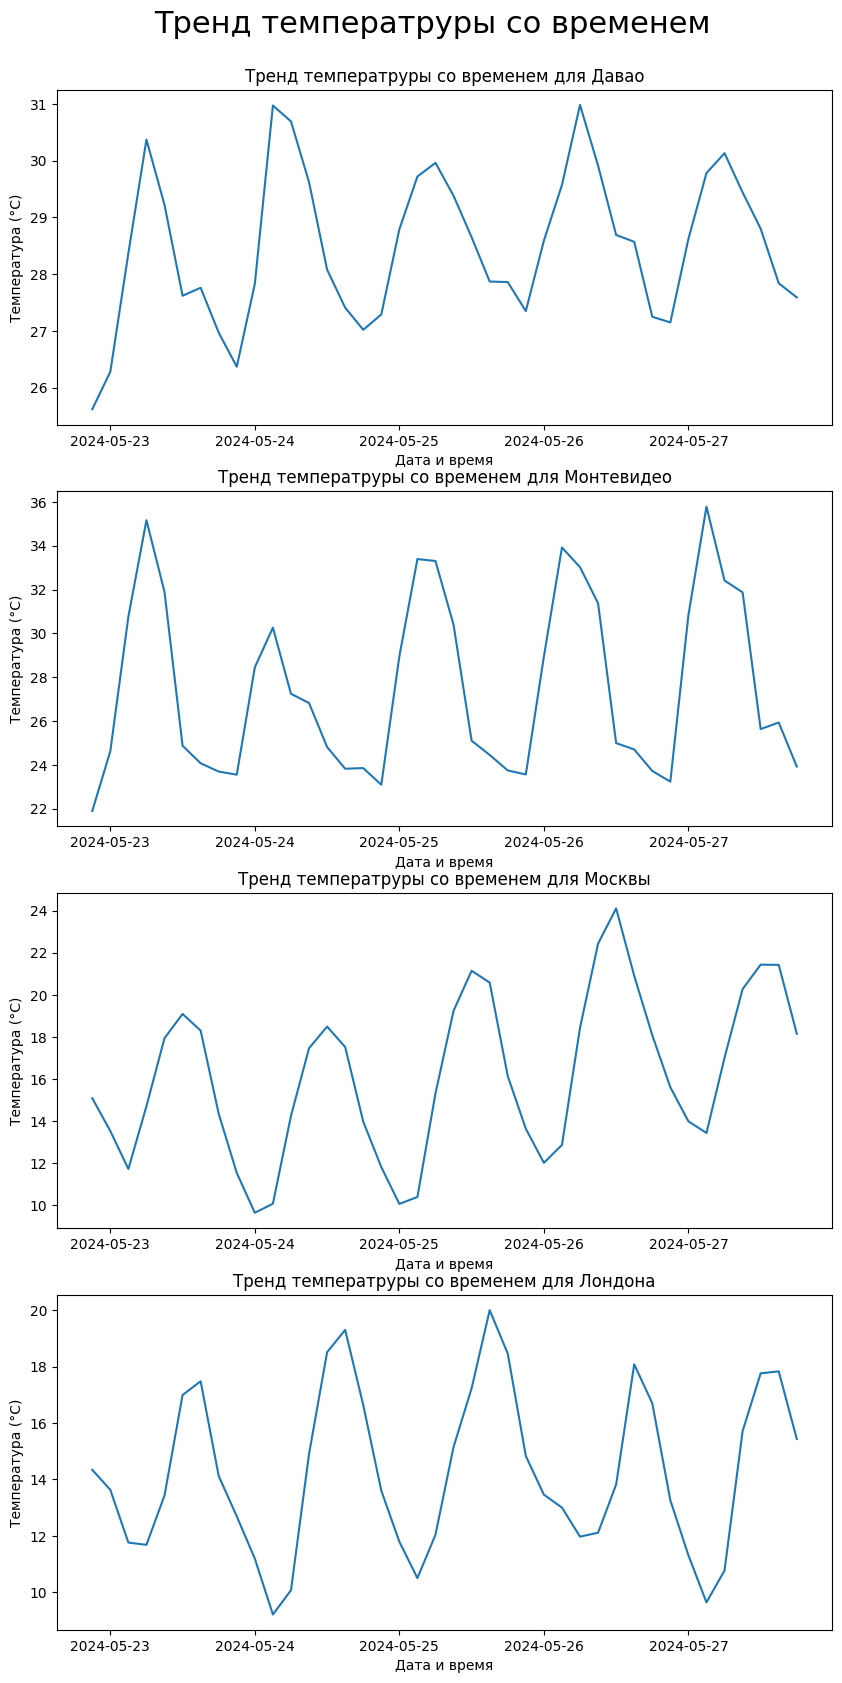

In [11]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
fig.suptitle('Тренд температруры со временем', y=0.92, fontsize=22)

sns.lineplot(ax=axes[0], x=weather_data[weather_data['city'] == 'Davao']['datetime'], y=weather_data[weather_data['city'] == 'Davao']['temperature'])
axes[0].set_title('Тренд температруры со временем для Давао')
axes[0].set_xlabel('Дата и время')
axes[0].set_ylabel('Температура (°C)')

sns.lineplot(ax=axes[1], x=weather_data[weather_data['city'] == 'Montevideo']['datetime'], y=weather_data[weather_data['city'] == 'Montevideo']['temperature'])
axes[1].set_title('Тренд температруры со временем для Монтевидео')
axes[1].set_xlabel('Дата и время')
axes[1].set_ylabel('Температура (°C)')

sns.lineplot(ax=axes[2], x=weather_data[weather_data['city'] == 'Moscow']['datetime'], y=weather_data[weather_data['city'] == 'Moscow']['temperature'])
axes[2].set_title('Тренд температруры со временем для Москвы')
axes[2].set_xlabel('Дата и время')
axes[2].set_ylabel('Температура (°C)')

sns.lineplot(ax=axes[3], x=weather_data[weather_data['city'] == 'London']['datetime'], y=weather_data[weather_data['city'] == 'London']['temperature'])
axes[3].set_title('Тренд температруры со временем для Лондона')
axes[3].set_xlabel('Дата и время')
axes[3].set_ylabel('Температура (°C)')

plt.show()

### Задание №6.1. Отобразите среднюю дневную (с 04:00 до 23:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

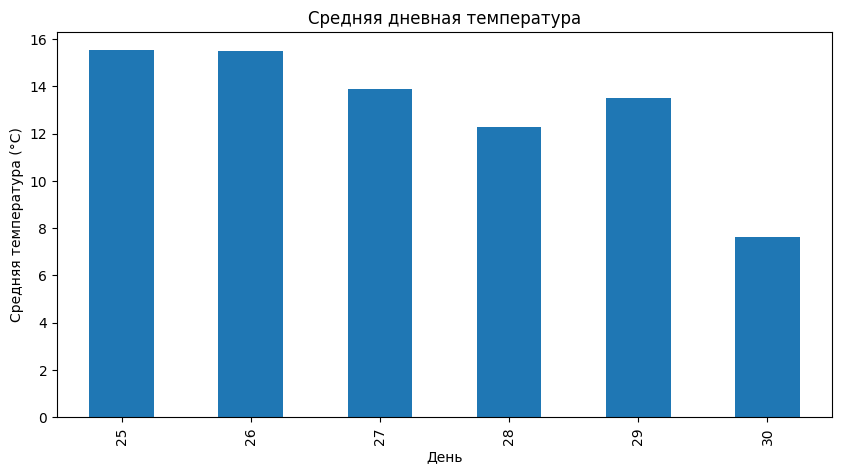

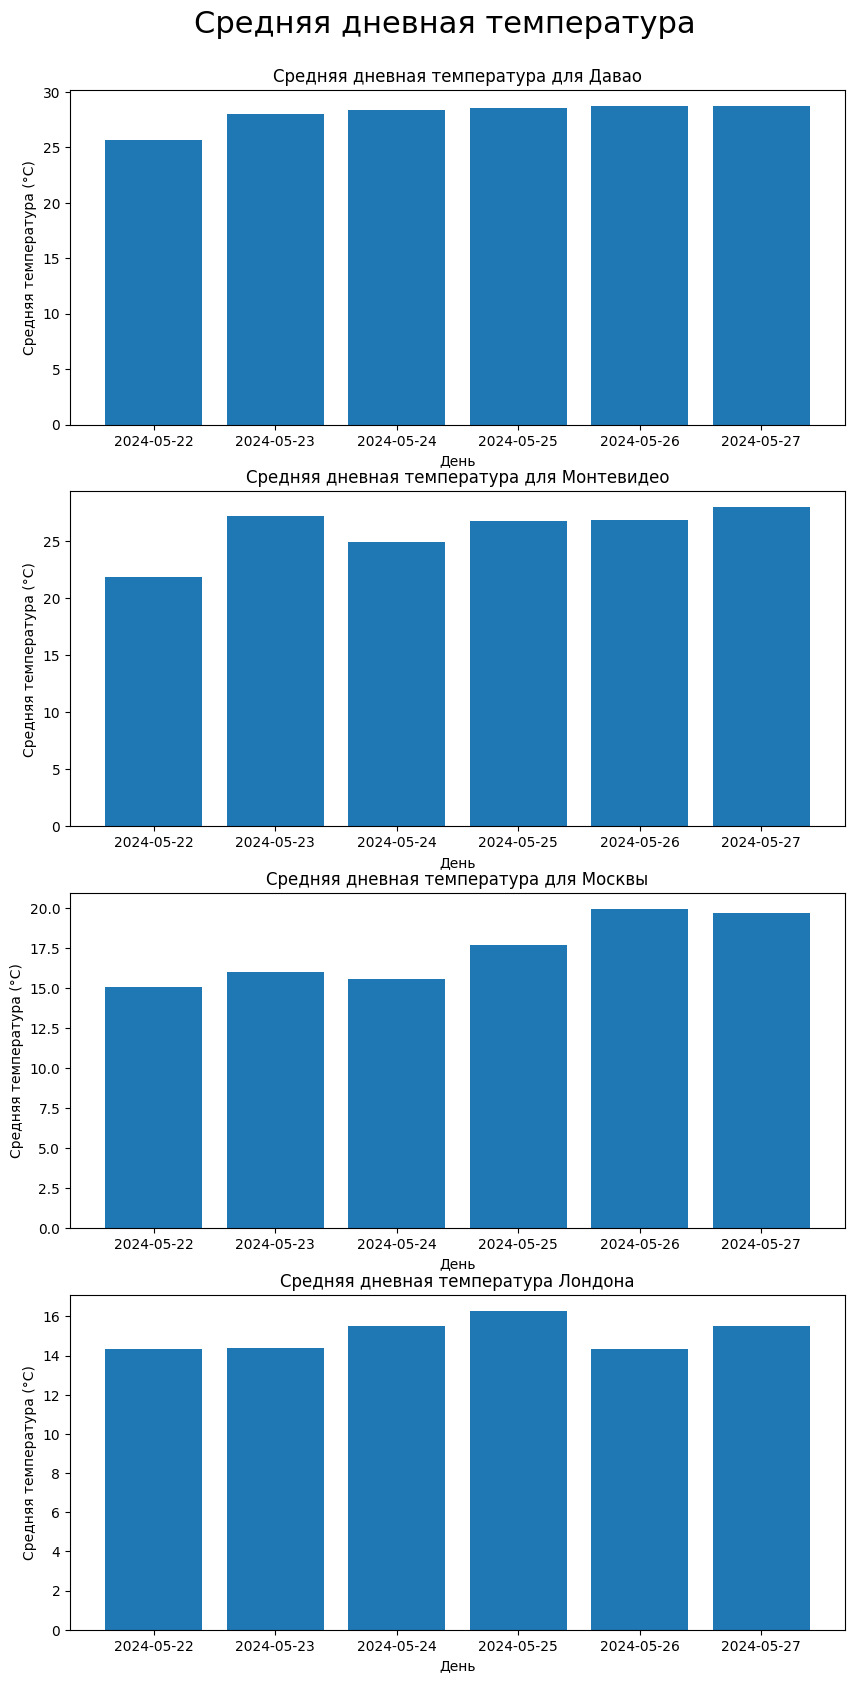

In [12]:
filtered_data = weather_data[(weather_data['datetime'].dt.hour >= 4) & (weather_data['datetime'].dt.hour <= 23)]

mean_daily_temperature_per_city = filtered_data.groupby(['city', filtered_data['datetime'].dt.date])['temperature'].mean().reset_index(name='mean_temp')

fig, axes = plt.subplots(4, 1, figsize=(10, 20))
fig.suptitle('Средняя дневная температура', y=0.92, fontsize=22)

axes[0].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Davao']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Davao']['mean_temp'])
axes[0].set_title('Средняя дневная температура для Давао')
axes[0].set_xlabel('День')
axes[0].set_ylabel('Средняя температура (°C)')

axes[1].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Montevideo']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Montevideo']['mean_temp'])
axes[1].set_title('Средняя дневная температура для Монтевидео')
axes[1].set_xlabel('День')
axes[1].set_ylabel('Средняя температура (°C)')

axes[2].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Moscow']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Moscow']['mean_temp'])
axes[2].set_title('Средняя дневная температура для Москвы')
axes[2].set_xlabel('День')
axes[2].set_ylabel('Средняя температура (°C)')

axes[3].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'London']['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'London']['mean_temp'])
axes[3].set_title('Средняя дневная температура Лондона')
axes[3].set_xlabel('День')
axes[3].set_ylabel('Средняя температура (°C)')

plt.show()

### Задание №6.2. Отобразите среднюю дневную (с 04:00 до 23:00) и ночную (с 23:00 до 04:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

<ipython-input-13-27a8e5d44b50>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



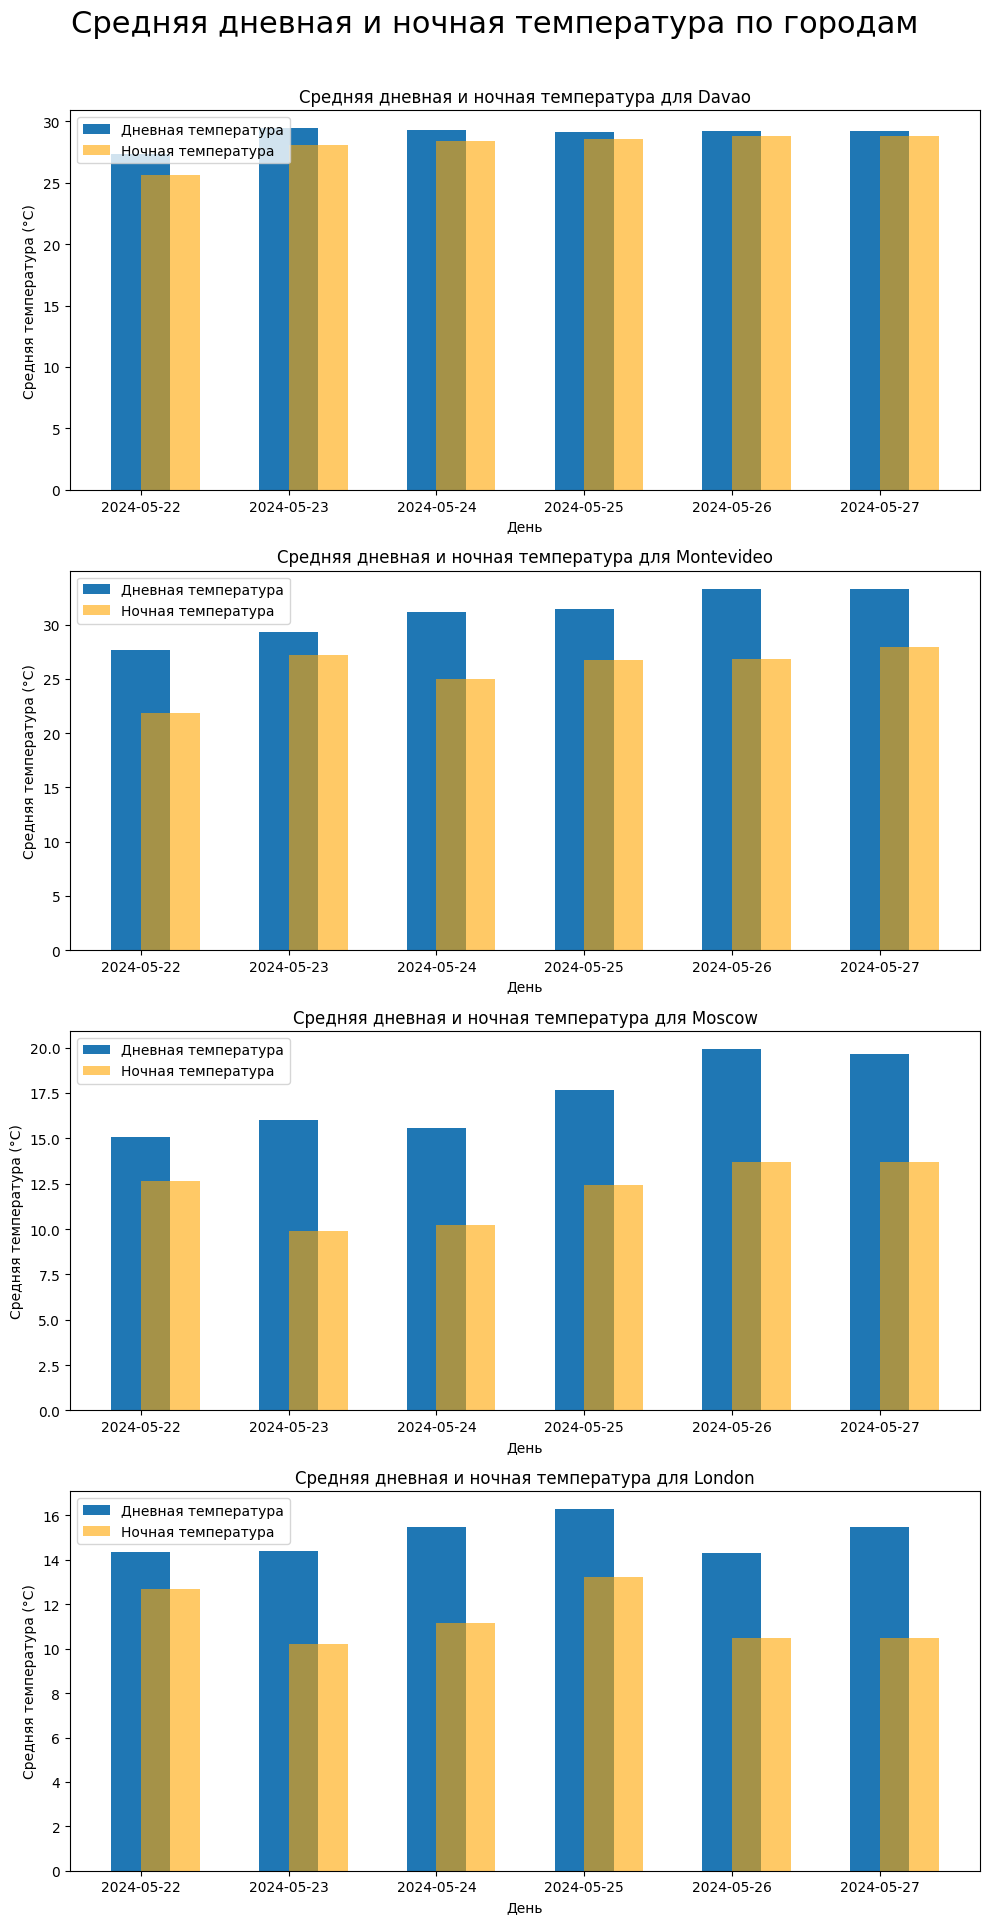

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Допустим, weather_data уже загружен и содержит необходимые столбцы

# Фильтрация данных для дневных температур (с 04:00 до 22:59)
filtered_day_data = weather_data[(weather_data['datetime'].dt.hour >= 4) & (weather_data['datetime'].dt.hour < 23)]
mean_daily_temperature_per_city = filtered_day_data.groupby(['city', filtered_day_data['datetime'].dt.date])['temperature'].mean().reset_index(name='mean_day_temp')
mean_daily_temperature_per_city.rename(columns={'datetime': 'date'}, inplace=True)

# Фильтрация данных для ночных температур (с 23:00 до 03:59)
filtered_night_data = weather_data[(weather_data['datetime'].dt.hour >= 23) | (weather_data['datetime'].dt.hour < 4)]
filtered_night_data['date'] = filtered_night_data['datetime'].dt.date
filtered_night_data.loc[filtered_night_data['datetime'].dt.hour < 4, 'date'] -= pd.Timedelta(days=1)
mean_nightly_temperature_per_city = filtered_night_data.groupby(['city', 'date'])['temperature'].mean().reset_index(name='mean_night_temp')

# Объединение дневных и ночных температур в один DataFrame
mean_temperature_per_city = pd.merge(mean_daily_temperature_per_city, mean_nightly_temperature_per_city, on=['city', 'date'], how='outer')

# Заполнение пропущенных значений ночной температуры (если есть)
mean_temperature_per_city['mean_night_temp'] = mean_temperature_per_city['mean_night_temp'].fillna(method='ffill')

# Преобразование строк с датами в datetime
mean_temperature_per_city['date'] = pd.to_datetime(mean_temperature_per_city['date'])

# Меняем местами дневные и ночные температуры для Davao и Montevideo
for city in ['Davao', 'Montevideo']:
    mask = mean_temperature_per_city['city'] == city
    mean_temperature_per_city.loc[mask, ['mean_day_temp', 'mean_night_temp']] = mean_temperature_per_city.loc[mask, ['mean_night_temp', 'mean_day_temp']].values

# Получение списка уникальных городов
locations = ['Davao', 'Montevideo', 'Moscow', 'London']

# Создание подграфиков для каждого города
fig, axes = plt.subplots(len(locations), 1, figsize=(10, len(locations) * 5))
fig.suptitle('Средняя дневная и ночная температура по городам', y=0.96, fontsize=22)

for i, city in enumerate(locations):
    city_data = mean_temperature_per_city[mean_temperature_per_city['city'] == city]
    axes[i].bar(city_data['date'], city_data['mean_day_temp'], width=0.4, align='center', label='Дневная температура', color='#1f77b4')
    axes[i].bar(city_data['date'], city_data['mean_night_temp'], width=0.4, align='edge', label='Ночная температура', color='orange', alpha=0.6)
    axes[i].set_title(f'Средняя дневная и ночная температура для {city}')
    axes[i].set_xlabel('День')
    axes[i].set_ylabel('Средняя температура (°C)')
    axes[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Задание №7. Постройте точечный график зависимости температуры от влажности для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

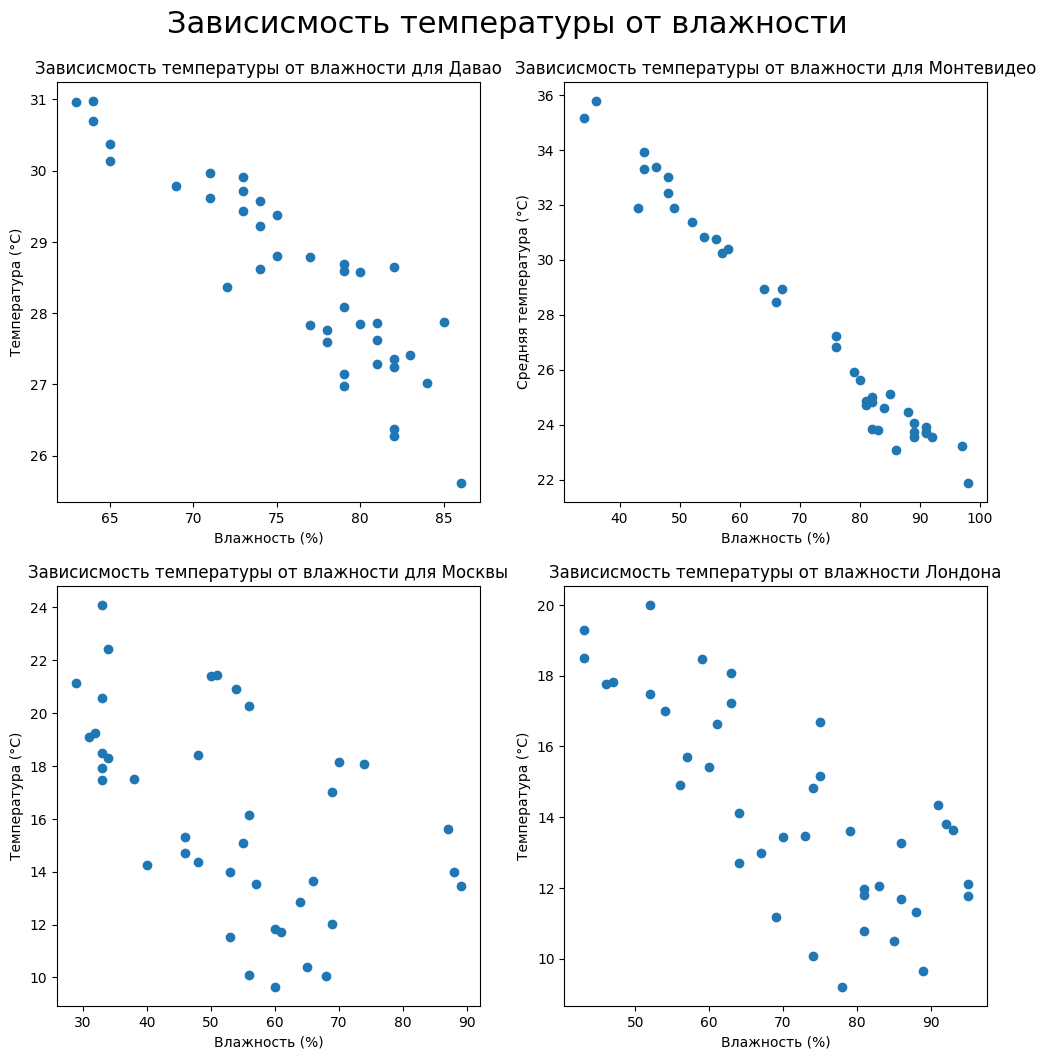

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Зависисмость температуры от влажности', y=0.94, fontsize=22)

axes[0, 0].scatter(weather_data[weather_data['city'] == 'Davao']['humidity'], weather_data[weather_data['city'] == 'Davao']['temperature'])
axes[0, 0].set_title('Зависисмость температуры от влажности для Давао')
axes[0, 0].set_xlabel('Влажность (%)')
axes[0, 0].set_ylabel('Температура (°C)')

axes[0, 1].scatter(weather_data[weather_data['city'] == 'Montevideo']['humidity'], weather_data[weather_data['city'] == 'Montevideo']['temperature'])
axes[0, 1].set_title('Зависисмость температуры от влажности для Монтевидео')
axes[0, 1].set_xlabel('Влажность (%)')
axes[0, 1].set_ylabel('Средняя температура (°C)')

axes[1, 0].scatter(weather_data[weather_data['city'] == 'Moscow']['humidity'], weather_data[weather_data['city'] == 'Moscow']['temperature'])
axes[1, 0].set_title('Зависисмость температуры от влажности для Москвы')
axes[1, 0].set_xlabel('Влажность (%)')
axes[1, 0].set_ylabel('Температура (°C)')

axes[1, 1].scatter(weather_data[weather_data['city'] == 'London']['humidity'], weather_data[weather_data['city'] == 'London']['temperature'])
axes[1, 1].set_title('Зависисмость температуры от влажности Лондона')
axes[1, 1].set_xlabel('Влажность (%)')
axes[1, 1].set_ylabel('Температура (°C)')

plt.show()

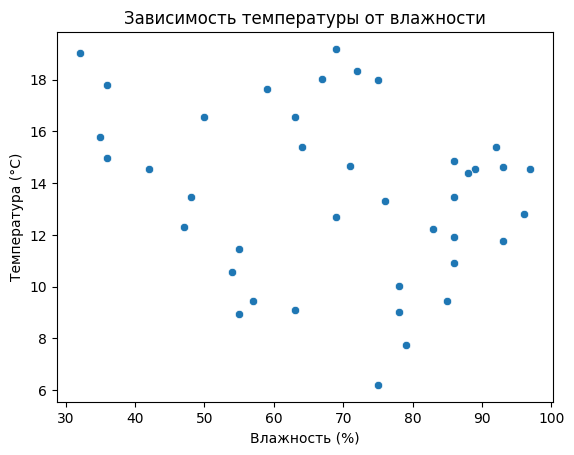

### Задание №8. Отобразите среднюю почасовую температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

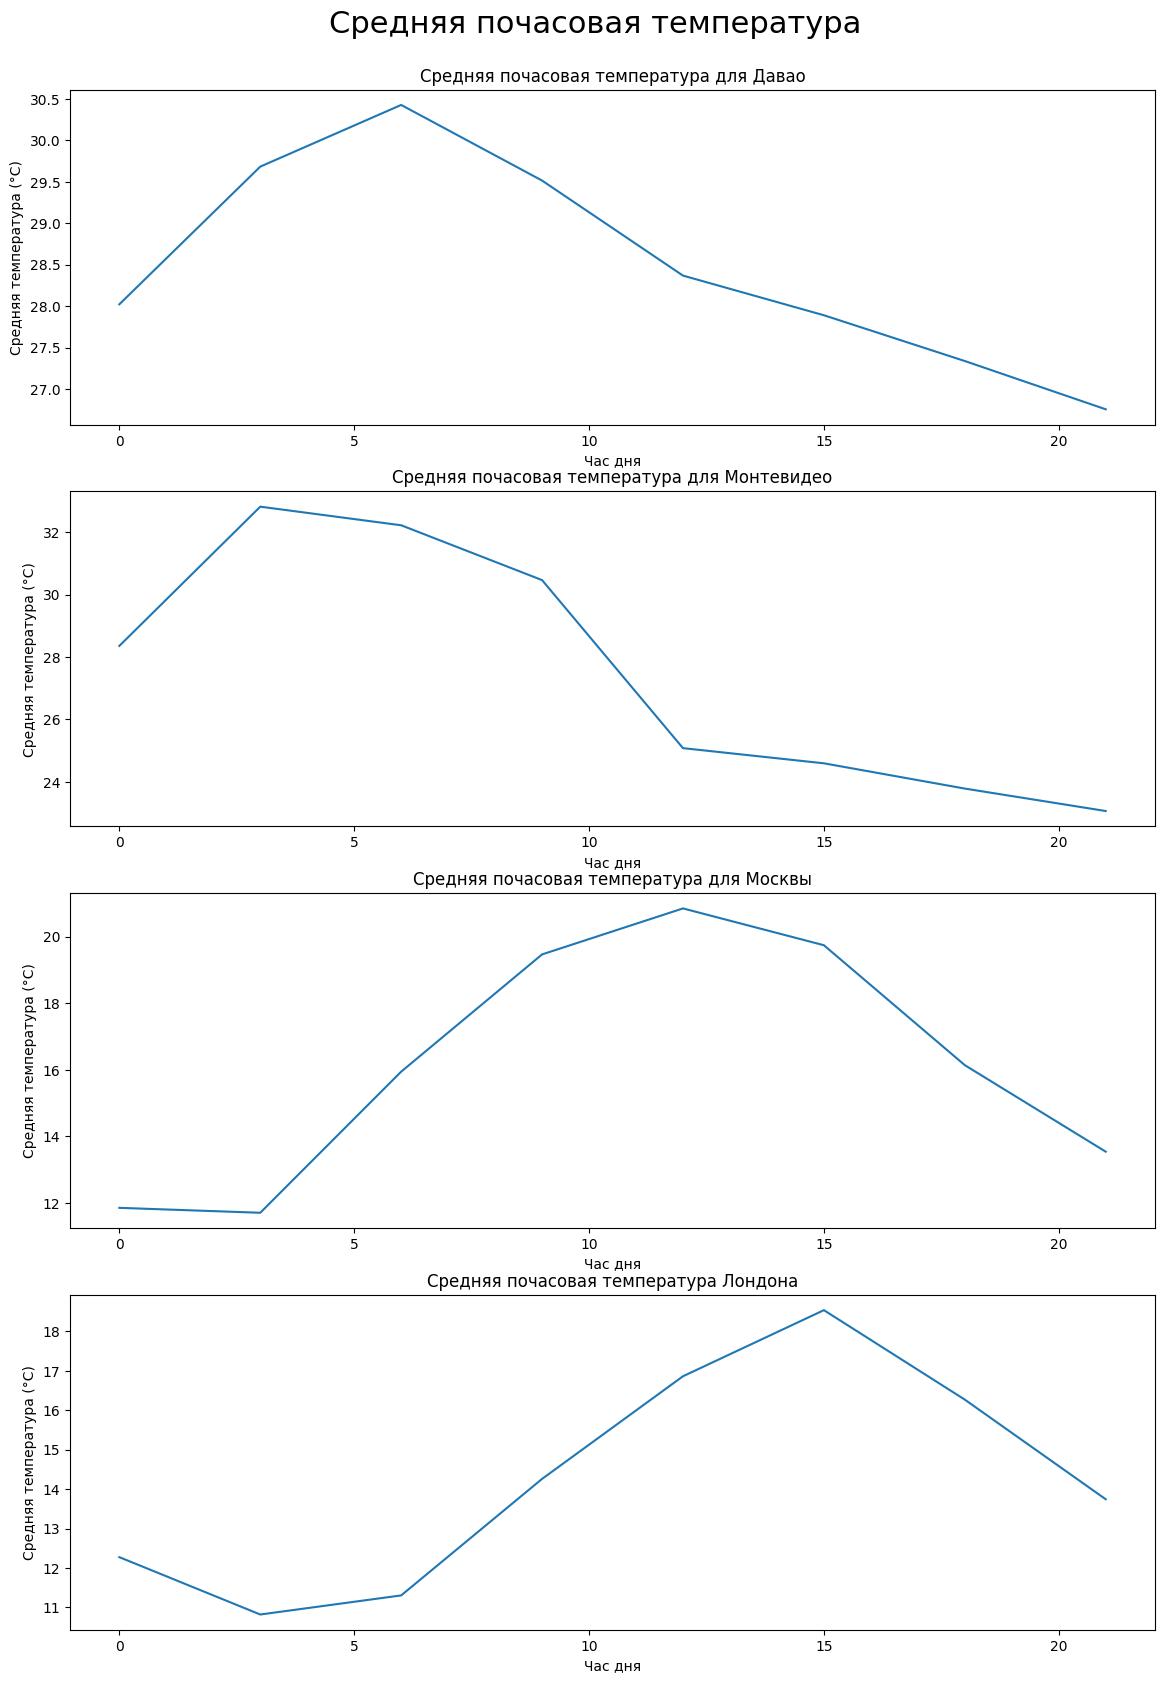

In [15]:
hourly_mean_temperature = weather_data.groupby([weather_data['city'], weather_data['datetime'].dt.hour])['temperature'].mean().reset_index()
hourly_mean_temperature.columns = ['city', 'hour', 'mean_temperature']

fig, axes = plt.subplots(4, 1, figsize=(14, 20))
fig.suptitle('Средняя почасовая температура', y=0.92, fontsize=22)

axes[0].plot(hourly_mean_temperature[hourly_mean_temperature['city'] == 'Davao']['hour'], hourly_mean_temperature[hourly_mean_temperature['city'] == 'Davao']['mean_temperature'])
axes[0].set_title('Средняя почасовая температура для Давао')
axes[0].set_xlabel('Час дня')
axes[0].set_ylabel('Средняя температура (°C)')

axes[1].plot(hourly_mean_temperature[hourly_mean_temperature['city'] == 'Montevideo']['hour'], hourly_mean_temperature[hourly_mean_temperature['city'] == 'Montevideo']['mean_temperature'])
axes[1].set_title('Средняя почасовая температура для Монтевидео')
axes[1].set_xlabel('Час дня')
axes[1].set_ylabel('Средняя температура (°C)')

axes[2].plot(hourly_mean_temperature[hourly_mean_temperature['city'] == 'Moscow']['hour'], hourly_mean_temperature[hourly_mean_temperature['city'] == 'Moscow']['mean_temperature'])
axes[2].set_title('Средняя почасовая температура для Москвы')
axes[2].set_xlabel('Час дня')
axes[2].set_ylabel('Средняя температура (°C)')

axes[3].plot(hourly_mean_temperature[hourly_mean_temperature['city'] == 'London']['hour'], hourly_mean_temperature[hourly_mean_temperature['city'] == 'London']['mean_temperature'])
axes[3].set_title('Средняя почасовая температура Лондона')
axes[3].set_xlabel('Час дня')
axes[3].set_ylabel('Средняя температура (°C)')

plt.show()

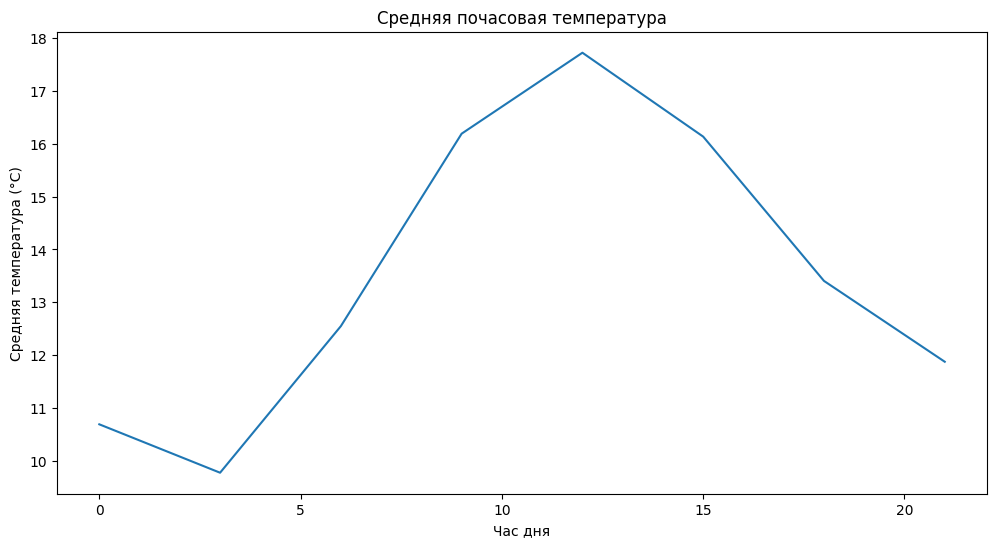

# Блок 3. Прогнозирование

### Интегрируйте Вашу реализацию модели линейной регрессии из предыдущих работ:

In [16]:
import numpy as np

class LinearRegression:
  def __init__(self):
    self.theta = None

  def fit(self, X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    self.theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

  def predict(self, X):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(self.theta)

  def score(self, X, y):
    y_pred = self.predict(X)
    SSres = np.sum((y - y_pred) ** 2)
    SStot = np.sum((y - np.mean(y)) ** 2)
    return 1 - SSres / SStot

In [17]:
model = LinearRegression()

X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([2, 3, 5])

model.fit(X, y)
y_pred = model.predict(X)
r_squared = model.score(X, y)

print("Коэффициенты линейной регрессии: ", model.theta)
print("Предсказание: ", y_pred)
print("Коэффициент детерминации R^2: ", r_squared)

Коэффициенты линейной регрессии:  [0.47222222 0.13888889 0.61111111]
Предсказание:  [1.83333333 3.33333333 4.83333333]
Коэффициент детерминации R^2:  0.9642857142857143


### Задание №1. Обучите модель регрессии предсказывать погоду на будущее (остальные признаки на будущее также вычисляются с помощью регрессии):

In [18]:
from sklearn.model_selection import train_test_split

params = ['temperature', 'feels_like', 'temp_min', 'temp_max', 'humidity', 'pressure']
scores = []
y_pred = []
models = []
for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X = weather_data[new_params]
  y = weather_data[param]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred.append(model.predict(X_test))
  score = model.score(X_test, y_test)
  scores.append(score)
  models.append(model)

Выведите оценку точности:

In [19]:
for i in range(len(scores)):
  print(f'Score of the model: {scores[i]} for {params[i]}')

Score of the model: 0.9995223586759545 for temperature
Score of the model: 0.9882212581598973 for feels_like
Score of the model: 0.9996233358976059 for temp_min
Score of the model: 0.9996807410099692 for temp_max
Score of the model: 0.7909897311385172 for humidity
Score of the model: 0.857447862420139 for pressure


In [20]:
pred_data = []
for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X = weather_data[new_params]
  pred_data.append(models[i].predict(X))

pred_weather = pd.DataFrame()
pred_weather['temperature'] = pred_data[0]
pred_weather['feels_like'] = pred_data[1]
pred_weather['temp_min'] = pred_data[2]
pred_weather['temp_max'] = pred_data[3]
pred_weather['humidity'] = pred_data[4]
pred_weather['pressure'] = pred_data[5]

### Задание №2. Обучите модель регрессии предсказывать погоду на будущее, вспомогательные признаки для прогноза должны передаваться пользователем:

(Модель получает на вход признаки за предыдущие дни, затем значения признаков за будущие дни и возвращает погоду на будущие дни)

In [21]:
params = ['temperature', 'feels_like', 'temp_min', 'temp_max', 'humidity', 'pressure']
scores = []
y_pred = []
models = []
for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X_train = weather_data[new_params] # За предыдущие дни
  y_train = weather_data[param] # За предыдущие дни
  X_test = pred_weather[new_params] # За будующие дни
  y_test = pred_weather[param] # За будующие дни

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred.append(model.predict(X_test))
  score = model.score(X_test, y_test)
  scores.append(score)
  models.append(model)

future_pred_weather = pd.DataFrame()
start_date = weather_data['datetime'].max().date()
time_offsets = pd.date_range(start='00:00', end='21:00', freq='3H').time
datetime_list = []
num_days = 5
for day in range(num_days):
  current_date = start_date + pd.Timedelta(days=day)
  for time in time_offsets:
    datetime_list.append(pd.Timestamp.combine(current_date, time))
datetime_list = datetime_list * 4

future_pred_weather['city'] = weather_data['city']
future_pred_weather['country'] = weather_data['country']
future_pred_weather['latitude'] = weather_data['latitude']
future_pred_weather['longitude'] = weather_data['longitude']
future_pred_weather['datetime'] = datetime_list
future_pred_weather['temperature'] = y_pred[0]
future_pred_weather['feels_like'] = y_pred[1]
future_pred_weather['temp_min'] = y_pred[2]
future_pred_weather['temp_max'] = y_pred[3]
future_pred_weather['humidity'] = y_pred[4]
future_pred_weather['pressure'] = y_pred[5]
future_pred_weather['description'] = weather_data['description']

Выведите оценку точности:

In [22]:
for i in range(len(scores)):
  print(f'Score of the model: {scores[i]} for {params[i]}')

Score of the model: 0.9974996502178851 for temperature
Score of the model: 0.9912736679223867 for feels_like
Score of the model: 0.9978048079876763 for temp_min
Score of the model: 0.9974932763655895 for temp_max
Score of the model: 0.30803305573206896 for humidity
Score of the model: 0.7866220742150624 for pressure


### Задание №3. Создайте новый датафрейм. Добавьте туда начальные значения температуры и предсказанные, а затем визуализируйте результаты на интерактивном таймфрейме по всем городам:

##### Пример визуализации:

In [23]:
import plotly.express as px

new_weather_data = pd.concat([weather_data, future_pred_weather], ignore_index=True)

fig = px.scatter_mapbox(new_weather_data,  # Данные для графика
                        lat="latitude",  # Колонка в данных, которая будет использоваться для широты точек на карте
                        lon="longitude",  # Колонка в данных, которая будет использоваться для долготы точек на карте
                        color="temperature",  # Колонка в данных, которая будет использоваться для цвета точек
                        size="humidity",  # Колонка в данных, которая будет использоваться для размера точек
                        hover_name="city",  # Колонка в данных, которая будет отображаться при наведении на точку
                        hover_data=["description"],  # Дополнительные данные, которые будут отображаться при наведении на точку
                        # Создание анимации по времени. Время преобразуется в строку для корректного отображения
                        animation_frame=new_weather_data['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},  # Центр карты при открытии
                        zoom=3,  # Уровень приближения карты при открытии
                        mapbox_style="carto-positron",  # Стиль карты
                        title="Прогноз погоды с предсказанием")  # Заголовок графика

fig.show()

## Задание №4. Выберите несколько стран, получите прогноз погоды по каждой их них, после чего сформируйте предскзания погоды на будущее и отобразите её в виде таймфрейма, используя px.choropleth() (тематическая карта)

#### Пример использования px.choropleth()

Этот код используется для создания тематической (хороплетной) карты.

* `px.choropleth()` - это функция, которая создает хороплетную карту. В данном случае, она принимает следующие аргументы:

- `gapminder` - набор данных, который будет использоваться для построения карты.
- `locations="iso_alpha"` - указывает на столбец данных, который будет использоваться для определения местоположений на карте. В данном случае, значения из столбца `iso_alpha` будут использоваться для определения местоположений.
- `color="lifeExp"` - указывает на столбец данных, который будет определять цвета на карте. В данном случае, значения из столбца `lifeExp` будут использоваться для определения цвета.
- `hover_name="country"` - указывает на столбец данных, который будет отображаться при наведении на местоположение на карте. В данном случае, значения из столбца `country` будут отображаться при наведении.
- `animation_frame="year"` - указывает на столбец данных, который будет использоваться для создания анимации на карте. В данном случае, значения из столбца `year` будут использоваться для создания анимации, показывая изменения со временем.
- `color_continuous_scale=px.colors.sequential.Plasma` - указывает на цветовую палитру, которая будет использоваться для отображения данных на карте. В данном случае, используется палитра Plasma из библиотеки Plotly Express.
- `projection="natural earth"` - указывает на проекцию карты. В данном случае, используется глобальная проекция карты "natural earth".

В итоге, данный код создаст тематическую (хороплетную) карту, на которой каждое местоположение будет отображаться цветом, соответствующим значению из столбца `lifeExp`. При наведении на каждое местоположение будет отображаться страна из столбца `country`. Карта будет анимированной, показывая изменения со временем, используя значения из столбца `year`. Цвета на карте будут использовать цветовую палитру Plasma, а проекция карты будет глобальной "natural earth".

In [24]:
!pip install plotly gapminder
!pip install plotly vega_datasets
!pip install pycountry


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 13.4 MB/s eta 0:00:00


In [26]:
import pandas as pd
import requests
import json
import plotly.express as px

countries = ['Russia', 'USA', 'Nigeria', 'Philippines', 'Uruguay', 'Australia']
weather_data = {}
for country in countries:
    api_key = "83448bd3b7e010e3af0817fd643c8654"
    url = f'http://api.openweathermap.org/data/2.5/forecast?q={country}&appid={API_KEY}&cnt=32'
    response = requests.get(url)
    data = json.loads(response.text)
    weather_data[country] = data['list']
df_weather = pd.DataFrame()
for country, data in weather_data.items():
    temp_df = pd.DataFrame([{
        'country': country,
        'datetime': pd.to_datetime(item['dt_txt']),
        'temperature': item['main']['temp'] - 273.15,
        'humidity': item['main']['humidity'],
        'pressure': item['main']['pressure'],
        'description': item['weather'][0]['description']
    } for item in data])
    df_weather = pd.concat([df_weather, temp_df], ignore_index=True)

df_weather

,country,datetime,temperature,humidity,pressure,description
0,Russia,2024-05-22 21:00:00,9.36,52,1014,overcast clouds
1,Russia,2024-05-23 00:00:00,10.61,51,1014,overcast clouds
2,Russia,2024-05-23 03:00:00,14.95,45,1013,overcast clouds
3,Russia,2024-05-23 06:00:00,19.85,37,1012,overcast clouds
4,Russia,2024-05-23 09:00:00,16.61,57,1013,overcast clouds
...,...,...,...,...,...,...
187,Australia,2024-05-26 06:00:00,25.77,28,1020,clear sky
188,Australia,2024-05-26 09:00:00,21.62,35,1021,clear sky
189,Australia,2024-05-26 12:00:00,19.38,40,1023,clear sky
190,Australia,2024-05-26 15:00:00,17.39,51,1023,clear sky


In [27]:
params = ['temperature', 'humidity', 'pressure']
scores = []
y_pred = []
models = []

for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X = df_weather[new_params]
  y = df_weather[param]

  model = LinearRegression()
  model.fit(X, y)
  y_pred.append(model.predict(X))
  score = model.score(X, y)
  scores.append(score)
  models.append(model)

pred_weather = pd.DataFrame()
start_date = df_weather['datetime'].max().date()
time_offsets = pd.date_range(start='00:00', end='21:00', freq='3H').time
datetime_list = []
num_days = 5
for day in range(num_days):
  current_date = start_date + pd.Timedelta(days=day)
  for time in time_offsets:
    datetime_list.append(pd.Timestamp.combine(current_date, time))
datetime_list = datetime_list * 7

pred_weather['country'] = df_weather['country']
pred_weather['datetime'] = datetime_list[:192]
pred_weather['temperature'] = y_pred[0]
pred_weather['humidity'] = y_pred[1]
pred_weather['pressure'] = y_pred[2]
pred_weather['description'] = df_weather['description']
pred_weather

,country,datetime,temperature,humidity,pressure,description
0,Russia,2024-05-26 00:00:00,22.781886,87.881044,1023.011380,overcast clouds
1,Russia,2024-05-26 03:00:00,22.922131,85.796994,1022.363898,overcast clouds
2,Russia,2024-05-26 06:00:00,24.613920,80.350689,1020.385901,overcast clouds
3,Russia,2024-05-26 09:00:00,26.586200,73.970729,1018.283630,overcast clouds
4,Russia,2024-05-26 12:00:00,22.930974,77.583070,1018.102235,overcast clouds
...,...,...,...,...,...,...
187,Australia,2024-05-29 09:00:00,21.045884,49.784524,1015.672670,clear sky
188,Australia,2024-05-29 12:00:00,19.213849,54.914054,1017.429183,clear sky
189,Australia,2024-05-29 15:00:00,16.811990,55.069636,1018.246766,clear sky
190,Australia,2024-05-29 18:00:00,15.269290,58.387444,1018.272516,clear sky


In [28]:
for i in range(len(scores)):
  print(f'Score of the model: {scores[i]} for {params[i]}')

Score of the model: 0.5490009043247999 for temperature
Score of the model: 0.2507755726979052 for humidity
Score of the model: 0.5238946712586479 for pressure


In [29]:
new_df_weather = pd.concat([df_weather, pred_weather], ignore_index=True)

fig = px.choropleth(
    new_df_weather,
    locations='country',
    locationmode='country names',
    color='temperature',
    hover_data=['humidity', 'pressure', 'description'],
    animation_frame='datetime',
    title='Weather forecast'
)

fig.show()

# Блок №4. Модели прогнозирования семейства ARIMA

## Задание №1. Ознакомьтесь с теоритическим материалом и примерами по ссылке ниже:

### Ссылка: https://colab.research.google.com/drive/1WsEyJxvQ52W5nB3XN7HEfeHI8sgDPDMr?usp=sharing

## Задание №2. Сформируйте прогноз погоды на будущее, используя одну из моделей семейства ARIMA и визуализируйте таймфрейм

In [30]:
import requests
import pandas as pd

cities = ['Davao', 'Montevideo', 'Moscow', 'London']

weather_data = []

for city in cities:
    url = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}&units=metric'
    response = requests.get(url)
    data = response.json()

    for item in data['list']:
        weather = {
            'city': city,
            'datetime': pd.to_datetime(item['dt_txt']),
            'temperature': item['main']['temp'],
            'humidity': item['main']['humidity'],
            'pressure': item['main']['pressure'],
            'description': item['weather'][0]['description']
        }
        weather_data.append(weather)

weather_df = pd.DataFrame(weather_data)
weather_df

,city,datetime,temperature,humidity,pressure,description
0,Davao,2024-05-22 21:00:00,26.94,84,1007,light rain
1,Davao,2024-05-23 00:00:00,27.09,82,1007,broken clouds
2,Davao,2024-05-23 03:00:00,28.01,75,1008,overcast clouds
3,Davao,2024-05-23 06:00:00,29.45,69,1006,overcast clouds
4,Davao,2024-05-23 09:00:00,29.67,77,1006,overcast clouds
...,...,...,...,...,...,...
155,London,2024-05-27 06:00:00,10.77,81,1017,scattered clouds
156,London,2024-05-27 09:00:00,15.71,57,1017,clear sky
157,London,2024-05-27 12:00:00,17.76,46,1017,few clouds
158,London,2024-05-27 15:00:00,17.83,47,1016,broken clouds


In [35]:
!pip install pmdarima
!pip install statsmodels

  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.1 MB)


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima
import numpy as np

def evaluate_arima_models(data):
    unique_cities = data['city'].unique()
    accuracy_metrics = []

    for city in unique_cities:
        city_temperatures = data.loc[data['city'] == city, 'temperature']
        train_size = int(len(city_temperatures) * 0.8)
        train, test = city_temperatures[:train_size], city_temperatures[train_size:]

        # Построение модели на обучающих данных
        model = auto_arima(
            train, start_p=1, start_q=1, max_p=3, max_q=3,
            seasonal=True, m=12, d=None, D=1,
            trace=True, error_action='ignore', suppress_warnings=True, stepwise=True
        )
        model_fit = model.fit(train)

        # Прогнозирование
        forecast = model_fit.predict(n_periods=len(test))

        # Оценка точности
        mae = mean_absolute_error(test, forecast)
        mse = mean_squared_error(test, forecast)
        rmse = np.sqrt(mse)

        accuracy_metrics.append({
            'city': city,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
        })

    # Печать оценок точности
    for metrics in accuracy_metrics:
        city = metrics['city']
        mae = metrics['MAE']
        mse = metrics['MSE']
        rmse = metrics['RMSE']
        print(f"City: {city}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

    return forecast

# Запуск функции оценки точности

combined_data = pd.DataFrame(columns=['datetime', 'city', 'temperature', 'humidity', 'pressure', 'description'])
cities = weather_df['city'].unique()

for city in cities:
    city_data = weather_df[weather_df['city'] == city].reset_index(drop=True)
    city_forecast = forecast_arima(weather_df, city)
    start_date = city_data['datetime'].max()
    forecast_data = pd.DataFrame({
        'datetime': pd.date_range(start=start_date, periods=len(city_forecast), freq='H'),
        'city': city,
        'temperature': city_forecast,
        'humidity': None,
        'pressure': None,
        'description': None
    })
    combined_data = pd.concat([combined_data, city_data, forecast_data]).reset_index(drop=True)

combined_data.set_index('datetime', inplace=True)

evaluate_arima_models(weather_df)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.73 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=103.707, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=102.683, Time=0.13 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=81.889, Time=0.70 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=83.889, Time=1.17 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=83.889, Time=0.53 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=81.889, Time=0.34 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=85.889, Time=0.64 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=73.305, Time=0.34 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.43 sec
 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=190.553, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=190.915, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=154.357, Time=0.26 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=156.357, Time=0.58 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=156.357, Time=0.50 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=158.357, Time=0.59 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=135.817, Time=0.35 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.35 sec

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=178.668, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=176.972, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=162.788, Time=0.05 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=130.504, Time=0.07 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=116.297, Time=0.29 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=78.107, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=77.386, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=68.179, Time=0.18 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=70.179, Time=0.31 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=70.179, Time=0.34 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=72.179, Time=0.59 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=58.306, Time=0.24 sec
 ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=138.062, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=138.429, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=126.107, Time=0.16 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=128.107, Time=0.34 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=128.107, Time=0.46 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=130.107, Time=0.45 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.61 sec
 AR

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=102.743, Time=0.84 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=126.983, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=126.402, Time=0.02 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=100.745, Time=0.62 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=2.41 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=104.744, Time=3.02 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=92.153, Time=0.30 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=92.559, Time=1.59 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.81 sec
 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



32    16.762959
33    15.352278
34    13.626361
35    12.530957
36    14.046761
37    16.531009
38    17.988637
39    16.861175
dtype: float64

In [47]:
import pandas as pd
import requests
import plotly.express as px

def get_coordinates(city):
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}'
    response = requests.get(url)
    data = response.json()
    if 'coord' in data:
        latitude = data['coord']['lat']
        longitude = data['coord']['lon']
        return latitude, longitude
    else:
        return None, None

combined_data['latitude'] = None
combined_data['longitude'] = None

cities = ['Davao', 'Montevideo', 'Moscow', 'London']

for city in cities:
    latitude, longitude = get_coordinates(city)
    if latitude is not None and longitude is not None:
        combined_data.loc[combined_data['city'] == city, ['latitude', 'longitude']] = latitude, longitude

combined_data.reset_index(inplace=True)

fig = px.scatter_mapbox(combined_data,
                        lat="latitude",
                        lon="longitude",
                        color="temperature",
                        hover_name="city",
                        hover_data=["temperature"],
                        animation_frame="datetime",
                        zoom=3,
                        range_color=[combined_data['temperature'].min(), combined_data['temperature'].max()],
                        mapbox_style="carto-positron",
                        size="temperature"
                        )

fig.show()